In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
training_set=pd.read_csv('trainset.csv')
training_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [18]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


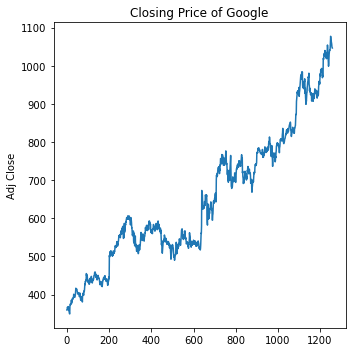

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")
plt.tight_layout()

Text(0.5, 1.0, 'Sales Volume')

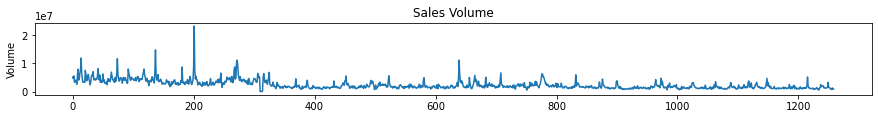

In [20]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume")

In [21]:
training_set=training_set.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)
X_train= training_set[0:1257]
y_train= training_set[1:1258]
X_train=np.reshape(X_train, (1257 , 1 , 1))

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
40/40 [==============================] - 2s 5ms/step - loss: 0.2487
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1614
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0724
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0451
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 11/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 12/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 13/100
40/40 [=================

40/40 [==============================] - 0s 3ms/step - loss: 2.4120e-04


In [26]:
test_set = pd.read_csv('testset.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (1,1,1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 1s 3ms/step


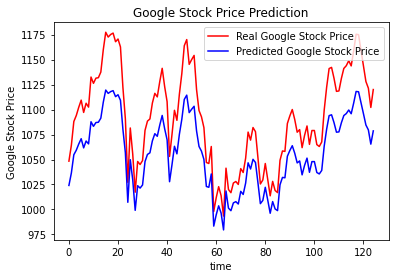

In [27]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()

In [25]:
test_set.shape

(125, 7)

In [29]:
from sklearn.metrics import accuracy_score
score = regressor.predict(y_test)
print(score)

NameError: name 'y_test' is not defined